# Taller 5

## JOHAN SEBASTIAN PARDO RUIZ

In [1]:
import sqlite3
import pandas as pd

class CovidRepository:
    table = "timeseries"  
    db_url = "C:\\Users\\jspar\\Downloads\\programacion_python_maestria_2025\\Taller 5\\covid19.db"
    
    def __init__(self):
        self.__connection = sqlite3.connect(self.db_url)

    def get_covid_data(self):
        try:
            query = f"""
                    SELECT 
                        t.date,
                        SUM(t.confirmed) AS confirmed,
                        SUM(t.deaths) AS deaths,
                        SUM(t.recovered) AS recovered
                    FROM {self.table} t
                    JOIN location l ON t.id = l.id
                    WHERE l.iso_alpha_2 = "CO"
                    GROUP BY t.date
                    ORDER BY t.date ASC;
                    """
            df = pd.read_sql_query(query, self.__connection)
            return df
        except Exception as e:
            print(f"Error {e}")
            return pd.DataFrame()


In [2]:
repo = CovidRepository()
df = repo.get_covid_data()

In [3]:
df.head()
df = df.fillna(0)
df.head()


,date,confirmed,deaths,recovered
0,2020-03-05,0.0,0.0,0.0
1,2020-03-06,3.0,0.0,0.0
2,2020-03-07,0.0,3.0,0.0
3,2020-03-08,0.0,0.0,0.0
4,2020-03-09,7.0,0.0,0.0


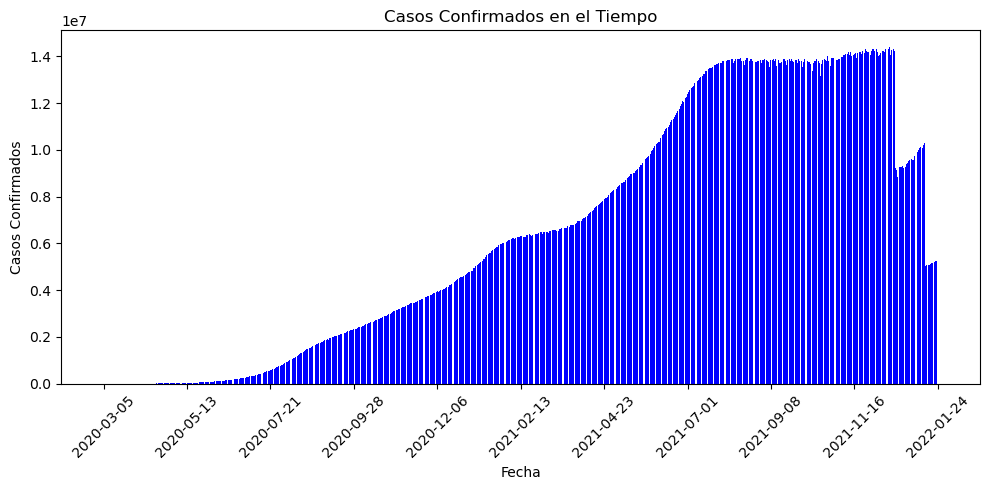

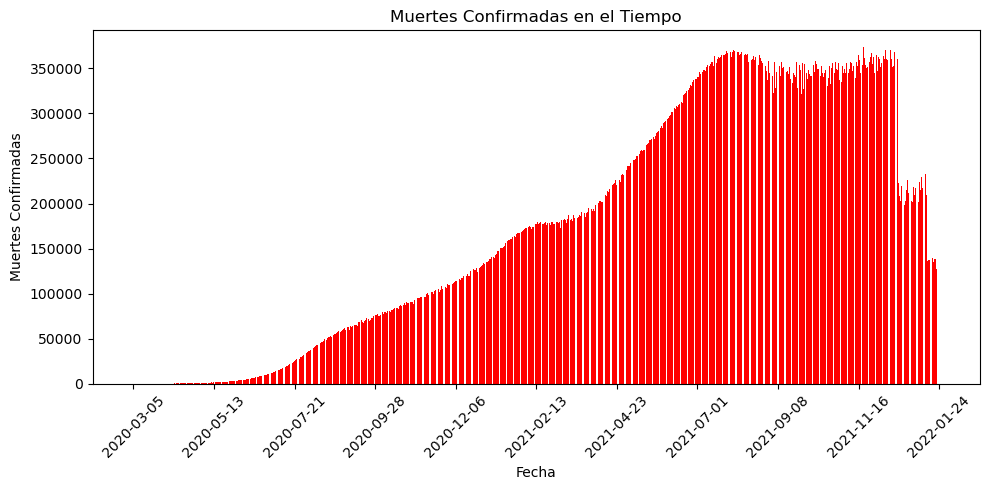

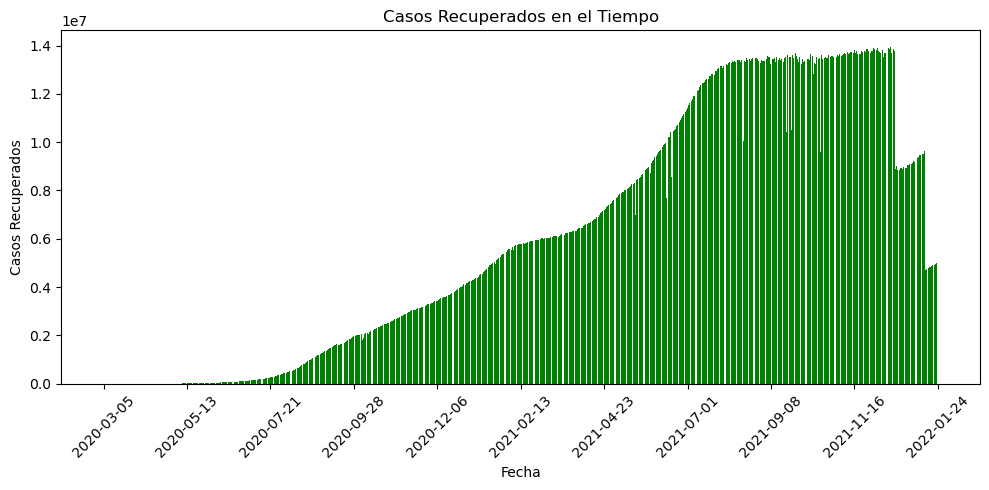

In [5]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 5))
plt.bar(df['date'], df['confirmed'], color='blue')
plt.title('Casos Confirmados en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)
plt.tight_layout()


plt.xticks(df['date'][::len(df)//10], rotation=45)  
plt.tight_layout()
plt.show()




plt.figure(figsize=(10, 5))
plt.bar(df['date'], df['deaths'], color='red')
plt.title('Muertes Confirmadas en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Muertes Confirmadas')
plt.xticks(rotation=45)
plt.tight_layout()


plt.xticks(df['date'][::len(df)//10], rotation=45)  
plt.tight_layout()
plt.show()




plt.figure(figsize=(10, 5))
plt.bar(df['date'], df['recovered'], color='green')
plt.title('Casos Recuperados en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Casos Recuperados')
plt.xticks(rotation=45)
plt.tight_layout()

plt.xticks(df['date'][::len(df)//10], rotation=45)  
plt.tight_layout()
plt.show()



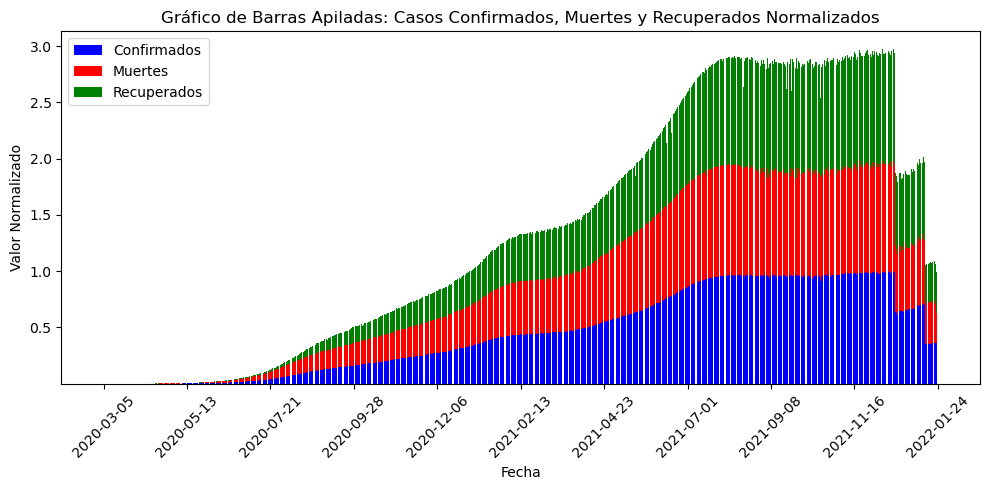

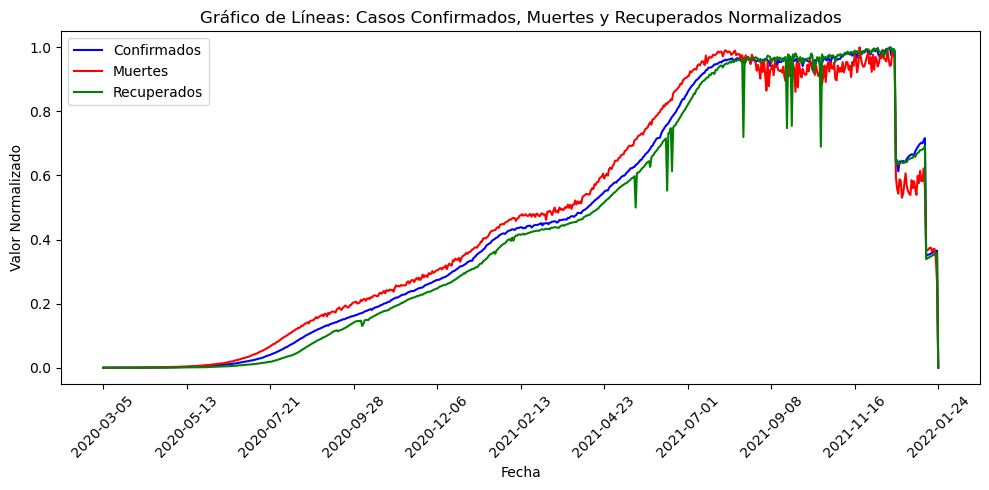

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Normalización 
confirmado = (df['confirmed'] - df['confirmed'].min()) / (df['confirmed'].max() - df['confirmed'].min()) if df['confirmed'].max() != df['confirmed'].min() else df['confirmed']
muertes = (df['deaths'] - df['deaths'].min()) / (df['deaths'].max() - df['deaths'].min()) if df['deaths'].max() != df['deaths'].min() else df['deaths']
recuperado = (df['recovered'] - df['recovered'].min()) / (df['recovered'].max() - df['recovered'].min()) if df['recovered'].max() != df['recovered'].min() else df['recovered']

plt.figure(figsize=(10, 5))
plt.bar(df['date'], confirmado, label='Confirmados', color='blue')
plt.bar(df['date'], muertes, bottom=confirmado, label='Muertes', color='red')
plt.bar(df['date'], recuperado, bottom=confirmado + muertes, label='Recuperados', color='green')

plt.title('Gráfico de Barras Apiladas: Casos Confirmados, Muertes y Recuperados Normalizados')
plt.xlabel('Fecha')
plt.ylabel('Valor Normalizado')
plt.legend()

# Mejorar eje X
plt.xticks(df['date'][::len(df)//10], rotation=45)  
plt.tight_layout()
plt.show()

# Gráfico de Líneas
plt.figure(figsize=(10, 5))
plt.plot(df['date'], confirmado, label='Confirmados', color='blue')
plt.plot(df['date'], muertes, label='Muertes', color='red')
plt.plot(df['date'], recuperado, label='Recuperados', color='green')

plt.title('Gráfico de Líneas: Casos Confirmados, Muertes y Recuperados Normalizados')
plt.xlabel('Fecha')
plt.ylabel('Valor Normalizado')
plt.legend()

# Mejorar eje X
plt.xticks(df['date'][::len(df)//10], rotation=45)  
plt.tight_layout()
plt.show()
